In [10]:
import numpy as np
import matplotlib.pyplot as plt
import overreact as rx

In [11]:
model = rx.parse_model("../../overreact/data/acetate/model.k")
k = rx.get_k(model.scheme, model.compounds)
model.scheme.compounds

('AcOH(aq)', 'AcO-(aq)', 'H+(aq)', 'AcOH(g)', 'AcO-(g)')

In [12]:
Y = []
pHs = np.linspace(0, 14)
for pH in pHs:
    scheme, kobs = rx.get_fixed_scheme(model.scheme, k, {"H+(aq)": 10**-pH})
    dydt = rx.get_dydt(scheme, kobs)
    y, _ = rx.get_y(dydt, [0.5, 0.0, 0.0, 0.0])
    Y.append(y(y.t_max))
Y = np.asarray(Y)

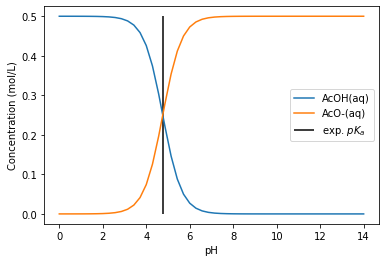

In [ ]:
for i, compound in enumerate(scheme.compounds):
    if "(aq)" in compound:
        plt.plot(pHs, Y[:, i], label=compound)

plt.vlines(4.756, 0.0, 0.5, label=r"exp. $pK_a$", color="k")
plt.xlabel("pH")
plt.ylabel("Concentration (mol/L)")
plt.legend()